In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
import warnings
from bayes_opt import BayesianOptimization, UtilityFunction
pd.set_option('display.max_columns',None)


warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('Clean_Dataset.csv', sep=',')

data = data.iloc[:, 1:]

data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
data = pd.get_dummies(data, columns=['airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class', 'stops'], drop_first=True)

In [15]:
shapiro(data['price'])

ShapiroResult(statistic=0.7521858811378479, pvalue=0.0)

In [16]:
cols = list(data.columns)
extra_cols = ['flight_6E-105',
 'flight_6E-121',
 'flight_6E-123',
 'flight_6E-128',
 'flight_6E-134',
 'flight_6E-138',
 'flight_6E-139',
 'flight_6E-151',
 'flight_6E-152',
 'flight_6E-153',
 'flight_6E-154',
 'flight_6E-156',
 'flight_6E-161',
 'flight_6E-168',
 'flight_6E-171',
 'flight_6E-177',
 'flight_6E-179',
 'flight_6E-184',
 'flight_6E-186',
 'flight_6E-188',
 'flight_6E-192',
 'flight_6E-193',
 'flight_6E-198',
 'flight_6E-199',
 'flight_6E-2001',
 'flight_6E-2005',
 'flight_6E-2007',
 'flight_6E-2008',
 'flight_6E-2013',
 'flight_6E-2022',
 'flight_6E-2026',
 'flight_6E-2031',
 'flight_6E-2032',
 'flight_6E-2033',
 'flight_6E-2042',
 'flight_6E-2043',
 'flight_6E-2047',
 'flight_6E-205',
 'flight_6E-2069',
 'flight_6E-207',
 'flight_6E-2076',
 'flight_6E-2077',
 'flight_6E-208',
 'flight_6E-2083',
 'flight_6E-2087',
 'flight_6E-2092',
 'flight_6E-2093',
 'flight_6E-2102',
 'flight_6E-2103',
 'flight_6E-2107',
 'flight_6E-212',
 'flight_6E-2127',
 'flight_6E-2168',
 'flight_6E-2172',
 'flight_6E-219',
 'flight_6E-2193',
 'flight_6E-221',
 'flight_6E-2247',
 'flight_6E-2248',
 'flight_6E-2249',
 'flight_6E-2274',
 'flight_6E-232',
 'flight_6E-2331',
 'flight_6E-2336',
 'flight_6E-2338',
 'flight_6E-234',
 'flight_6E-2343',
 'flight_6E-2346',
 'flight_6E-236',
 'flight_6E-2367',
 'flight_6E-2373',
 'flight_6E-244',
 'flight_6E-245',
 'flight_6E-2471',
 'flight_6E-2474',
 'flight_6E-2478',
 'flight_6E-2479',
 'flight_6E-248',
 'flight_6E-251',
 'flight_6E-2511',
 'flight_6E-2516',
 'flight_6E-2518',
 'flight_6E-261',
 'flight_6E-2616',
 'flight_6E-2618',
 'flight_6E-2719',
 'flight_6E-2753',
 'flight_6E-276',
 'flight_6E-2763',
 'flight_6E-2769',
 'flight_6E-282',
 'flight_6E-2843',
 'flight_6E-285',
 'flight_6E-286',
 'flight_6E-289',
 'flight_6E-2901',
 'flight_6E-2914',
 'flight_6E-292',
 'flight_6E-2938',
 'flight_6E-2939',
 'flight_6E-294',
 'flight_6E-298',
 'flight_6E-307',
 'flight_6E-309',
 'flight_6E-312',
 'flight_6E-318',
 'flight_6E-319',
 'flight_6E-321',
 'flight_6E-3211',
 'flight_6E-3214',
 'flight_6E-327',
 'flight_6E-331',
 'flight_6E-345',
 'flight_6E-354',
 'flight_6E-356',
 'flight_6E-357',
 'flight_6E-358',
 'flight_6E-363',
 'flight_6E-365',
 'flight_6E-368',
 'flight_6E-369',
 'flight_6E-371',
 'flight_6E-374',
 'flight_6E-394',
 'flight_6E-397',
 'flight_6E-398',
 'flight_6E-401',
 'flight_6E-408',
 'flight_6E-409',
 'flight_6E-415',
 'flight_6E-416',
 'flight_6E-417',
 'flight_6E-425',
 'flight_6E-426',
 'flight_6E-434',
 'flight_6E-436',
 'flight_6E-439',
 'flight_6E-442',
 'flight_6E-448',
 'flight_6E-453',
 'flight_6E-455',
 'flight_6E-469',
 'flight_6E-477',
 'flight_6E-478',
 'flight_6E-484',
 'flight_6E-487',
 'flight_6E-488',
 'flight_6E-489',
 'flight_6E-495',
 'flight_6E-5002',
 'flight_6E-5003',
 'flight_6E-5006',
 'flight_6E-5014',
 'flight_6E-5016',
 'flight_6E-5017',
 'flight_6E-5018',
 'flight_6E-5026',
 'flight_6E-5031',
 'flight_6E-5037',
 'flight_6E-5038',
 'flight_6E-5042',
 'flight_6E-5047',
 'flight_6E-5059',
 'flight_6E-5063',
 'flight_6E-5071',
 'flight_6E-5073',
 'flight_6E-5088',
 'flight_6E-512',
 'flight_6E-514',
 'flight_6E-5175',
 'flight_6E-5176',
 'flight_6E-519',
 'flight_6E-5206',
 'flight_6E-5207',
 'flight_6E-5211',
 'flight_6E-524',
 'flight_6E-528',
 'flight_6E-5303',
 'flight_6E-5308',
 'flight_6E-5313',
 'flight_6E-5316',
 'flight_6E-5317',
 'flight_6E-5325',
 'flight_6E-5332',
 'flight_6E-5336',
 'flight_6E-5337',
 'flight_6E-534',
 'flight_6E-5342',
 'flight_6E-5345',
 'flight_6E-5349',
 'flight_6E-5369',
 'flight_6E-537',
 'flight_6E-5371',
 'flight_6E-5373',
 'flight_6E-5375',
 'flight_6E-5376',
 'flight_6E-5391',
 'flight_6E-5394',
 'flight_6E-542',
 'flight_6E-543',
 'flight_6E-5431',
 'flight_6E-544',
 'flight_6E-546',
 'flight_6E-5501',
 'flight_6E-557',
 'flight_6E-559',
 'flight_6E-561',
 'flight_6E-562',
 'flight_6E-566',
 'flight_6E-575',
 'flight_6E-588',
 'flight_6E-599',
 'flight_6E-6004',
 'flight_6E-6006',
 'flight_6E-6012',
 'flight_6E-6014',
 'flight_6E-6017',
 'flight_6E-6021',
 'flight_6E-6023',
 'flight_6E-6029',
 'flight_6E-605',
 'flight_6E-6067',
 'flight_6E-607',
 'flight_6E-6084',
 'flight_6E-6086',
 'flight_6E-6087',
 'flight_6E-6094',
 'flight_6E-6095',
 'flight_6E-6096',
 'flight_6E-6098',
 'flight_6E-6106',
 'flight_6E-6109',
 'flight_6E-611',
 'flight_6E-6111',
 'flight_6E-6113',
 'flight_6E-6121',
 'flight_6E-6128',
 'flight_6E-6148',
 'flight_6E-6171',
 'flight_6E-6172',
 'flight_6E-6178',
 'flight_6E-6186',
 'flight_6E-6187',
 'flight_6E-6189',
 'flight_6E-6195',
 'flight_6E-6197',
 'flight_6E-6198',
 'flight_6E-6201',
 'flight_6E-6205',
 'flight_6E-6206',
 'flight_6E-621',
 'flight_6E-6211',
 'flight_6E-6213',
 'flight_6E-6214',
 'flight_6E-6215',
 'flight_6E-6217',
 'flight_6E-6227',
 'flight_6E-6231',
 'flight_6E-6233',
 'flight_6E-6245',
 'flight_6E-6257',
 'flight_6E-626',
 'flight_6E-6264',
 'flight_6E-6268',
 'flight_6E-6269',
 'flight_6E-627',
 'flight_6E-6277',
 'flight_6E-6282',
 'flight_6E-6292',
 'flight_6E-6293',
 'flight_6E-6294',
 'flight_6E-6307',
 'flight_6E-6309',
 'flight_6E-6319',
 'flight_6E-6324',
 'flight_6E-6326',
 'flight_6E-6339',
 'flight_6E-6366',
 'flight_6E-638',
 'flight_6E-6381',
 'flight_6E-6393',
 'flight_6E-6417',
 'flight_6E-6433',
 'flight_6E-6444',
 'flight_6E-6467',
 'flight_6E-6474',
 'flight_6E-6475',
 'flight_6E-6478',
 'flight_6E-6479',
 'flight_6E-6491',
 'flight_6E-6513',
 'flight_6E-6517',
 'flight_6E-6535',
 'flight_6E-6553',
 'flight_6E-6567',
 'flight_6E-6591',
 'flight_6E-6593',
 'flight_6E-6597',
 'flight_6E-6613',
 'flight_6E-6616',
 'flight_6E-6623',
 'flight_6E-6636',
 'flight_6E-668',
 'flight_6E-6717',
 'flight_6E-6719',
 'flight_6E-6721',
 'flight_6E-6737',
 'flight_6E-6741',
 'flight_6E-6749',
 'flight_6E-6753',
 'flight_6E-6781',
 'flight_6E-6785',
 'flight_6E-6798',
 'flight_6E-6802',
 'flight_6E-6809',
 'flight_6E-6815',
 'flight_6E-6817',
 'flight_6E-6825',
 'flight_6E-684',
 'flight_6E-6865',
 'flight_6E-6876',
 'flight_6E-6897',
 'flight_6E-6915',
 'flight_6E-6926',
 'flight_6E-6939',
 'flight_6E-695',
 'flight_6E-6971',
 'flight_6E-698',
 'flight_6E-6993',
 'flight_6E-702',
 'flight_6E-7076',
 'flight_6E-7084',
 'flight_6E-711',
 'flight_6E-7114',
 'flight_6E-7115',
 'flight_6E-7127',
 'flight_6E-7141',
 'flight_6E-7147',
 'flight_6E-7149',
 'flight_6E-7156',
 'flight_6E-7175',
 'flight_6E-7193',
 'flight_6E-7195',
 'flight_6E-7202',
 'flight_6E-7204',
 'flight_6E-7208',
 'flight_6E-7221',
 'flight_6E-7223',
 'flight_6E-7224',
 'flight_6E-7227',
 'flight_6E-7234',
 'flight_6E-725',
 'flight_6E-7252',
 'flight_6E-7257',
 'flight_6E-7259',
 'flight_6E-7261',
 'flight_6E-7264',
 'flight_6E-7293',
 'flight_6E-7298',
 'flight_6E-7307',
 'flight_6E-7329',
 'flight_6E-7336',
 'flight_6E-7348',
 'flight_6E-736',
 'flight_6E-739',
 'flight_6E-7403',
 'flight_6E-7407',
 'flight_6E-747',
 'flight_6E-751',
 'flight_6E-757',
 'flight_6E-7583',
 'flight_6E-7587',
 'flight_6E-7589',
 'flight_6E-759',
 'flight_6E-761',
 'flight_6E-767',
 'flight_6E-772',
 'flight_6E-793',
 'flight_6E-796',
 'flight_6E-798',
 'flight_6E-802',
 'flight_6E-804',
 'flight_6E-806',
 'flight_6E-809',
 'flight_6E-821',
 'flight_6E-822',
 'flight_6E-825',
 'flight_6E-841',
 'flight_6E-847',
 'flight_6E-848',
 'flight_6E-854',
 'flight_6E-856',
 'flight_6E-865',
 'flight_6E-866',
 'flight_6E-881',
 'flight_6E-882',
 'flight_6E-886',
 'flight_6E-887',
 'flight_6E-889',
 'flight_6E-892',
 'flight_6E-897',
 'flight_6E-917',
 'flight_6E-922',
 'flight_6E-926',
 'flight_6E-927',
 'flight_6E-932',
 'flight_6E-938',
 'flight_6E-943',
 'flight_6E-945',
 'flight_6E-947',
 'flight_6E-951',
 'flight_6E-958',
 'flight_6E-959',
 'flight_6E-961',
 'flight_6E-967',
 'flight_6E-969',
 'flight_6E-973',
 'flight_6E-978',
 'flight_6E-987',
 'flight_6E-992',
 'flight_6E-994',
 'flight_6E-998',
 'flight_AI-402',
 'flight_AI-406',
 'flight_AI-407',
 'flight_AI-423',
 'flight_AI-431',
 'flight_AI-433',
 'flight_AI-439',
 'flight_AI-441',
 'flight_AI-442',
 'flight_AI-451',
 'flight_AI-471',
 'flight_AI-479',
 'flight_AI-487',
 'flight_AI-489',
 'flight_AI-493',
 'flight_AI-509',
 'flight_AI-523',
 'flight_AI-543',
 'flight_AI-544',
 'flight_AI-546',
 'flight_AI-551',
 'flight_AI-559',
 'flight_AI-563',
 'flight_AI-583',
 'flight_AI-603',
 'flight_AI-604',
 'flight_AI-610',
 'flight_AI-629',
 'flight_AI-636',
 'flight_AI-641',
 'flight_AI-660',
 'flight_AI-675',
 'flight_AI-676',
 'flight_AI-681',
 'flight_AI-683',
 'flight_AI-688',
 'flight_AI-743',
 'flight_AI-745',
 'flight_AI-748',
 'flight_AI-763',
 'flight_AI-765',
 'flight_AI-772',
 'flight_AI-780',
 'flight_AI-787',
 'flight_AI-837',
 'flight_AI-839',
 'flight_AI-861',
 'flight_AI-867',
 'flight_AI-877',
 'flight_AI-888',
 'flight_AI-9030',
 'flight_AI-9720',
 'flight_AI-9755',
 'flight_AI-9875',
 'flight_AI-9885',
 'flight_AI-9887',
 'flight_AI-9893',
 'flight_AI-9894',
 'flight_AI-9919',
 'flight_AI-9929',
 'flight_AI-9931',
 'flight_AI-9937',
 'flight_AI-9939',
 'flight_AI-9991',
 'flight_G8-102',
 'flight_G8-107',
 'flight_G8-108',
 'flight_G8-113',
 'flight_G8-1171',
 'flight_G8-121',
 'flight_G8-123',
 'flight_G8-131',
 'flight_G8-1404',
 'flight_G8-143',
 'flight_G8-145',
 'flight_G8-146',
 'flight_G8-151',
 'flight_G8-153',
 'flight_G8-165',
 'flight_G8-171',
 'flight_G8-188',
 'flight_G8-199',
 'flight_G8-203',
 'flight_G8-207',
 'flight_G8-209',
 'flight_G8-211',
 'flight_G8-2201',
 'flight_G8-2231',
 'flight_G8-2401',
 'flight_G8-2403',
 'flight_G8-241',
 'flight_G8-2411',
 'flight_G8-2417',
 'flight_G8-2440',
 'flight_G8-2501',
 'flight_G8-2504',
 'flight_G8-2506',
 'flight_G8-2508',
 'flight_G8-2509',
 'flight_G8-2511',
 'flight_G8-2513',
 'flight_G8-2606',
 'flight_G8-2607',
 'flight_G8-266',
 'flight_G8-268',
 'flight_G8-275',
 'flight_G8-292',
 'flight_G8-299',
 'flight_G8-300',
 'flight_G8-305',
 'flight_G8-312',
 'flight_G8-3184',
 'flight_G8-321',
 'flight_G8-322',
 'flight_G8-325',
 'flight_G8-334',
 'flight_G8-338',
 'flight_G8-339',
 'flight_G8-341',
 'flight_G8-345',
 'flight_G8-347',
 'flight_G8-357',
 'flight_G8-374',
 'flight_G8-381',
 'flight_G8-382',
 'flight_G8-383',
 'flight_G8-384',
 'flight_G8-391',
 'flight_G8-393',
 'flight_G8-397',
 'flight_G8-398',
 'flight_G8-401',
 'flight_G8-403',
 'flight_G8-404',
 'flight_G8-405',
 'flight_G8-423',
 'flight_G8-426',
 'flight_G8-505',
 'flight_G8-506',
 'flight_G8-510',
 'flight_G8-517',
 'flight_G8-519',
 'flight_G8-530',
 'flight_G8-551',
 'flight_G8-571',
 'flight_G8-625',
 'flight_G8-626',
 'flight_G8-661',
 'flight_G8-676',
 'flight_G8-704',
 'flight_G8-705',
 'flight_G8-719',
 'flight_G8-7536',
 'flight_G8-7537',
 'flight_G8-7538',
 'flight_G8-7541',
 'flight_G8-7542',
 'flight_G8-7543',
 'flight_G8-7545',
 'flight_G8-7546',
 'flight_G8-7549',
 'flight_G8-7553',
 'flight_G8-7556',
 'flight_G8-7557',
 'flight_G8-7562',
 'flight_G8-787',
 'flight_G8-792',
 'flight_G8-806',
 'flight_G8-808',
 'flight_G8-812',
 'flight_G8-813',
 'flight_G8-815',
 'flight_G8-873',
 'flight_G8-911',
 'flight_G8-917',
 'flight_G8-962',
 'flight_I5-1228',
 'flight_I5-1229',
 'flight_I5-1426',
 'flight_I5-1454',
 'flight_I5-1517',
 'flight_I5-1518',
 'flight_I5-1531',
 'flight_I5-1540',
 'flight_I5-1543',
 'flight_I5-1562',
 'flight_I5-1566',
 'flight_I5-1622',
 'flight_I5-1727',
 'flight_I5-1731',
 'flight_I5-1782',
 'flight_I5-1783',
 'flight_I5-1982',
 'flight_I5-2462',
 'flight_I5-2991',
 'flight_I5-330',
 'flight_I5-338',
 'flight_I5-360',
 'flight_I5-361',
 'flight_I5-5204',
 'flight_I5-5205',
 'flight_I5-5402',
 'flight_I5-5405',
 'flight_I5-5406',
 'flight_I5-547',
 'flight_I5-559',
 'flight_I5-588',
 'flight_I5-589',
 'flight_I5-722',
 'flight_I5-736',
 'flight_I5-737',
 'flight_I5-741',
 'flight_I5-768',
 'flight_I5-788',
 'flight_I5-818',
 'flight_I5-820',
 'flight_I5-821',
 'flight_I5-830',
 'flight_I5-881',
 'flight_I5-892',
 'flight_I5-941',
 'flight_I5-972',
 'flight_I5-974',
 'flight_I5-991',
 'flight_SG-1031',
 'flight_SG-1032',
 'flight_SG-1054',
 'flight_SG-1058',
 'flight_SG-1059',
 'flight_SG-1061',
 'flight_SG-1062',
 'flight_SG-107',
 'flight_SG-1072',
 'flight_SG-1074',
 'flight_SG-1077',
 'flight_SG-1089',
 'flight_SG-1090',
 'flight_SG-1092',
 'flight_SG-163',
 'flight_SG-191',
 'flight_SG-223',
 'flight_SG-2277',
 'flight_SG-241',
 'flight_SG-2508',
 'flight_SG-254',
 'flight_SG-263',
 'flight_SG-264',
 'flight_SG-2643',
 'flight_SG-292',
 'flight_SG-3233',
 'flight_SG-3239',
 'flight_SG-3248',
 'flight_SG-3321',
 'flight_SG-339',
 'flight_SG-3564',
 'flight_SG-3719',
 'flight_SG-3723',
 'flight_SG-3725',
 'flight_SG-3728',
 'flight_SG-3835',
 'flight_SG-389',
 'flight_SG-395',
 'flight_SG-4005',
 'flight_SG-406',
 'flight_SG-415',
 'flight_SG-438',
 'flight_SG-467',
 'flight_SG-468',
 'flight_SG-487',
 'flight_SG-5006',
 'flight_SG-5018',
 'flight_SG-5019',
 'flight_SG-5025',
 'flight_SG-5067',
 'flight_SG-5068',
 'flight_SG-5072',
 'flight_SG-5073',
 'flight_SG-5074',
 'flight_SG-5075',
 'flight_SG-5079',
 'flight_SG-5091',
 'flight_SG-5092',
 'flight_SG-5094',
 'flight_SG-520',
 'flight_SG-6003',
 'flight_SG-6006',
 'flight_SG-6016',
 'flight_SG-6017',
 'flight_SG-6018',
 'flight_SG-634',
 'flight_SG-635',
 'flight_SG-649',
 'flight_SG-679',
 'flight_SG-732',
 'flight_SG-768',
 'flight_SG-8106',
 'flight_SG-8169',
 'flight_SG-8171',
 'flight_SG-8179',
 'flight_SG-8187',
 'flight_SG-8193',
 'flight_SG-8195',
 'flight_SG-8339',
 'flight_SG-8411',
 'flight_SG-8480',
 'flight_SG-8483',
 'flight_SG-8645',
 'flight_SG-8701',
 'flight_SG-8709',
 'flight_SG-8723',
 'flight_SG-8903',
 'flight_SG-8910',
 'flight_SG-8913',
 'flight_SG-946',
 'flight_SG-9911',
 'flight_SG-9923',
 'flight_SG-9974',
 'flight_UK-613',
 'flight_UK-657',
 'flight_UK-671',
 'flight_UK-727',
 'flight_UK-741',
 'flight_UK-801',
 'flight_UK-815',
 'flight_UK-824',
 'flight_UK-826',
 'flight_UK-832',
 'flight_UK-835',
 'flight_UK-837',
 'flight_UK-839',
 'flight_UK-960',
 'flight_UK-994',
 'departure_time_Late_Night',
 'departure_time_Night',
 'destination_city_Delhi']
[cols.remove(col) for col in extra_cols]
cols.remove('price')

In [17]:
X = data[cols]

y = data['price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=1)

In [10]:
lr_X_train = add_constant(X_train)
lr = OLS(y_train, lr_X_train)
result = lr.fit()

print(result.summary())

p_values = result.pvalues

# Filter features with p-values greater than 0.05
features_with_high_p_values = p_values[p_values > 0.05].index.tolist()

print("Features with P-values greater than 0.05:", features_with_high_p_values)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1887.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:30:55   Log-Likelihood:            -2.4369e+06
No. Observations:              240122   AIC:                         4.877e+06
Df Residuals:                  238541   BIC:                         4.893e+06
Df Model:                        1580                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [11]:
features_with_high_p_values

['flight_6E-105',
 'flight_6E-121',
 'flight_6E-123',
 'flight_6E-128',
 'flight_6E-134',
 'flight_6E-138',
 'flight_6E-139',
 'flight_6E-151',
 'flight_6E-152',
 'flight_6E-153',
 'flight_6E-154',
 'flight_6E-156',
 'flight_6E-161',
 'flight_6E-168',
 'flight_6E-171',
 'flight_6E-177',
 'flight_6E-179',
 'flight_6E-184',
 'flight_6E-186',
 'flight_6E-188',
 'flight_6E-192',
 'flight_6E-193',
 'flight_6E-198',
 'flight_6E-199',
 'flight_6E-2001',
 'flight_6E-2005',
 'flight_6E-2007',
 'flight_6E-2008',
 'flight_6E-2013',
 'flight_6E-2022',
 'flight_6E-2026',
 'flight_6E-2031',
 'flight_6E-2032',
 'flight_6E-2033',
 'flight_6E-2042',
 'flight_6E-2043',
 'flight_6E-2047',
 'flight_6E-205',
 'flight_6E-2069',
 'flight_6E-207',
 'flight_6E-2076',
 'flight_6E-2077',
 'flight_6E-208',
 'flight_6E-2083',
 'flight_6E-2087',
 'flight_6E-2092',
 'flight_6E-2093',
 'flight_6E-2102',
 'flight_6E-2103',
 'flight_6E-2107',
 'flight_6E-212',
 'flight_6E-2127',
 'flight_6E-2168',
 'flight_6E-2172',
 '

In [37]:
rf_model = RandomForestRegressor(min_samples_leaf=1, min_samples_split=20, max_leaf_nodes=80, max_depth=8, n_estimators=40, n_jobs=-1)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_leaf_nodes=80, min_samples_split=20,
                      n_estimators=40, n_jobs=-1)

In [38]:
y_pred = rf_model.predict(X_test)

In [39]:
mean_absolute_percentage_error(y_test, y_pred)

0.1272164639390422


In [24]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from bayes_opt import BayesianOptimization
import numpy as np

# Define a custom scorer for MAPE
def mape_scorer(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = make_scorer(mape_scorer, greater_is_better=False)

# Define the parameter space
param_space = {
    'n_estimators': (20, 200),
    'max_depth': (8, 60),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 5),
    'max_leaf_nodes': (8, 80)
}

# Objective function using MAPE
def objective_function(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes):
    model = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_leaf_nodes=int(max_leaf_nodes),
        n_jobs=-1
    )
    score = cross_val_score(model, X_train, y_train, cv=5, scoring=mape_score).mean()
    return score

# Initialize the Bayesian optimizer
optimizer = BayesianOptimization(f=objective_function, pbounds=param_space, random_state=1)

# Run the optimization
optimizer.maximize(init_points=2, n_iter=30)

# Best hyperparameters
best_params = optimizer.max['params']
print(best_params)

|   iter    |  target   | max_depth | max_le... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------


CURRENTLY TRAIN AND TEST ARE SMALL AF

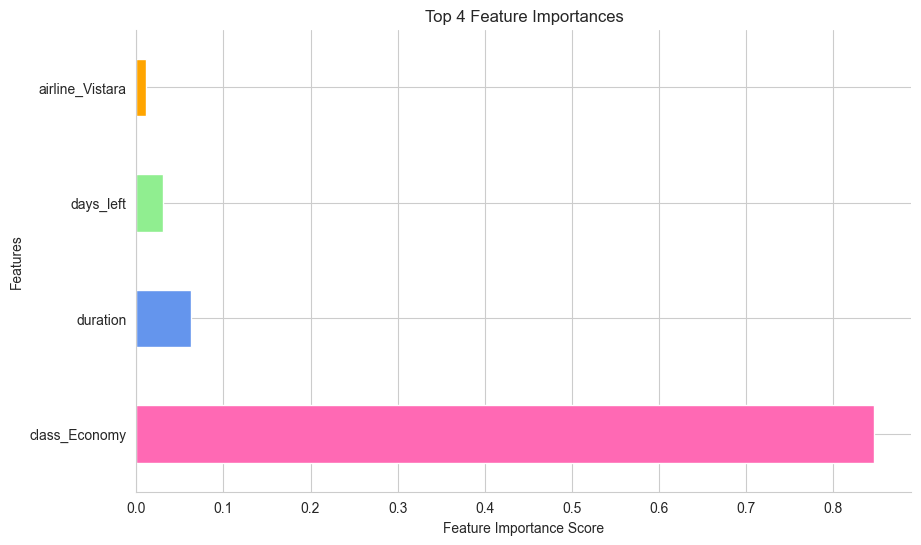

In [73]:
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette(["#FF69B4", "#6495ED", "#90EE90", "#FFA500"])  # pink, blue, green, orange

# Plot the feature importances
plt.figure(figsize=(10, 6))  # Set the figure size
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh', color=palette)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 4 Feature Importances')

# Remove the right and top spines
sns.despine()

# Show the plot
plt.show()

<Figure size 1400x1200 with 0 Axes>

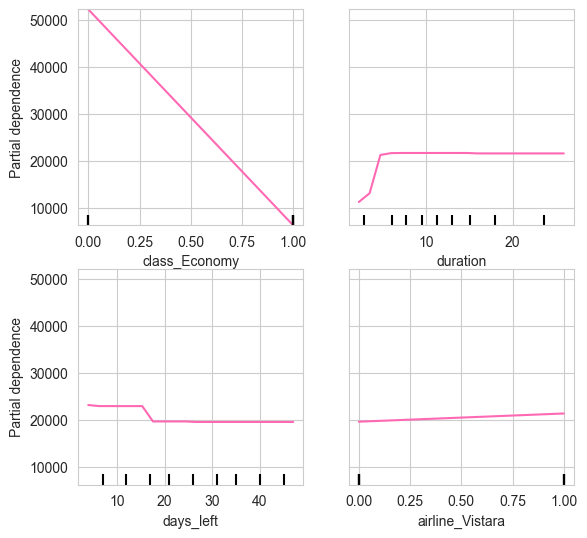

In [84]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import seaborn as sns

palette = sns.color_palette(["#FF69B4", "#6495ED", "#90EE90", "#FFA500"])

plt.figure(figsize=(14, 12))
display = PartialDependenceDisplay.from_estimator(
    model,
    X,
    ['class_Economy', 'duration', 'days_left', 'airline_Vistara'],
    grid_resolution=20,
    n_cols=2
)

for ax_idx, ax in enumerate(display.axes_.ravel()):
    for line_idx, line in enumerate(ax.get_lines()):
        line.set_color(palette[line_idx % len(palette)])
    for box_idx, box in enumerate(ax.get_lines()):
        box.set_color(palette[box_idx % len(palette)])

plt.subplots_adjust(top=1.1)
plt.show()


In [66]:
feat_importances

duration                    0.063016
days_left                   0.030109
airline_Air_India           0.007180
airline_GO_FIRST            0.003464
airline_Indigo              0.002109
                              ...   
destination_city_Kolkata    0.001177
destination_city_Mumbai     0.003228
class_Economy               0.847741
stops_two_or_more           0.002611
stops_zero                  0.000127
Length: 833, dtype: float64

In [57]:
np.argsort(importances)

array([416, 520, 521, 522, 523, 524, 525, 526, 527, 528, 519, 529, 531,
       532, 533, 534, 535, 536, 537, 538, 539, 530, 518, 517, 516, 495,
       496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508,
       509, 510, 511, 512, 513, 514, 515, 540, 494, 541, 543, 569, 570,
       571, 572, 573, 574, 575, 576, 577, 568, 578, 580, 581, 582, 583,
       584, 585, 586, 587, 588, 579, 567, 566, 565, 544, 545, 546, 547,
       548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560,
       561, 562, 563, 564, 542, 589, 493, 491, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 421, 431, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 432, 420, 419, 418, 395, 396, 398, 399, 801, 402, 403,
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 806,
       417, 442, 492, 443, 445, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 470, 480, 482, 483, 484, 485, 486, 487, 488, 489, 490, 481,
       469, 468, 467, 446, 447, 448, 449, 450, 451, 452, 453, 45